# Descripción

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

 Análisis exploratorio de datos (Python)

In [20]:
#importando librerias

import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np


In [21]:
#Lectura de Datos
data1=pd.read_csv("/datasets/project_sql_result_01.csv")
data2=pd.read_csv("/datasets/project_sql_result_04.csv")


In [22]:
data1=data1.drop_duplicates()
print(data1.info())
print(data1.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB
None
                               company_name  trips_amount
41                     Chicago Star Taxicab            29
12                Dispatch Taxi Affiliation          3355
14  Patriot Taxi Dba Peace Taxi Association          2235
47            4615 - 83503 Tyrone Henderson            21
30                               Setare Inc           230
46          3620 - 52292 David K. Cab Corp.            21
20                             Checker Taxi          1486
3                                Yellow Cab          9888
55                6057 - 24657 Richard Addo            13
28                              5 Star Taxi           310


In [23]:
print(data2.info())
print(data2.sample(10))
data2=data2.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
   dropoff_location_name  average_trips
44        Belmont Cragin      59.033333
33          Portage Park     119.733333
1            River North    9523.666667
67        Auburn Gresham      15.166667
5              Lake View    2420.966667
8             Gold Coast    1364.233333
68              Clearing      14.500000
83           Avalon Park       6.966667
69              Roseland      14.366667
24            West Ridge     298.333333


In [24]:
data1["company_name"].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

Los tipos de datos de ambas tablas son correctos, no valore nulos, ni duplicados.

Identificar los 10 principales barrios en términos de finalización del recorrido

In [25]:
data2=data2.sort_values(by="average_trips",ascending=False)
print(data2.head(10))
data2=data2[0:9]

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [26]:
import matplotlib.pyplot as plt

def diagrama_pareto(data, frecuencia, categoria):
    # Ordenar data
    data.sort_values(by=frecuencia)

    # Calcular la contribución acumulativo
    total = sum(data[frecuencia])
    porcentajes = [(frecuencia / total) *
                   100 for frecuencia in data[frecuencia]]
    porcentajes_acumulativos = [sum(porcentajes[:i+1])
                                for i in range(len(porcentajes))]
    
    # Modificar el tamaño del gráfico
    plt.figure(figsize=(10, 8))  # 10 pulgadas de ancho, 6 pulgadas de alto
   

    # Crear el gráfico de Pareto
    fig, ax1 = plt.subplots()
    # Gráfico de barras
    ax1.bar(data[categoria], data[frecuencia], color='b',width=0.5)
    ax1.set_ylabel('Frecuencia', color='b')
    ax1.set_xticklabels(data[categoria], rotation=90)
    # Crear el eje secundario para la línea acumulativa
    ax2 = ax1.twinx()
    ax2.plot(data[categoria], porcentajes_acumulativos,
             color='r', marker='o', linestyle='-')
    ax2.set_ylabel('Porcentaje acumulado (%)', color='r')
    # Etiquetas y título
    
    plt.title('Gráfico de Pareto')
    plt.grid(True)
    # Mostrar el gráfico
    plt.show()

   

/tmp/ipykernel_27/2037836544.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data[categoria], rotation=90)


<Figure size 720x576 with 0 Axes>

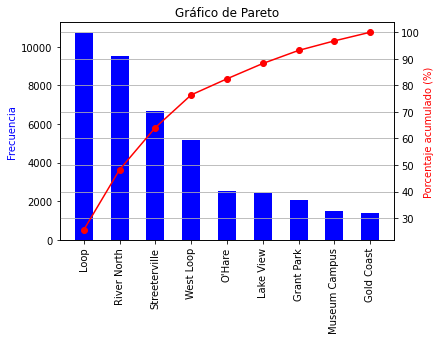

In [27]:
 diagrama_pareto(data2,"average_trips", "dropoff_location_name")

Empresas de taxis y número de viajes

In [28]:
data1=data1.sort_values(by="trips_amount",ascending=False)
print(data1.head(10))
data1=data1[0:9]

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


/tmp/ipykernel_27/2037836544.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data[categoria], rotation=90)


<Figure size 720x576 with 0 Axes>

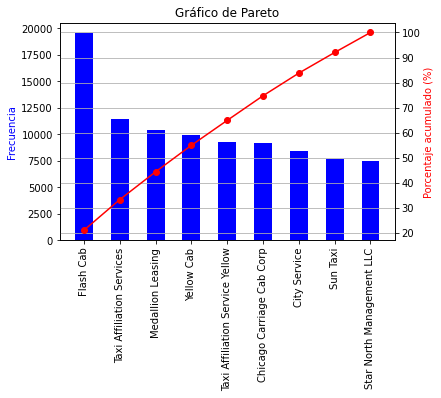

In [29]:
 diagrama_pareto(data1,"trips_amount", "company_name")

Los destinos con mayor frecuencia fueron  Loop,River North,Streeterville y West Loop.
La compañia con el mayor numero de viajes fue Flash Cab.

Paso 5. Prueba de hipótesis (Python)

In [30]:
data3=pd.read_csv("/datasets/project_sql_result_07.csv")
data3.sample(5)

,start_ts,weather_conditions,duration_seconds
229,2017-11-11 15:00:00,Good,2160.0
853,2017-11-11 08:00:00,Good,1380.0
1003,2017-11-18 08:00:00,Bad,1483.0
180,2017-11-04 16:00:00,Bad,3270.0
903,2017-11-11 13:00:00,Good,2148.0


In [31]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [32]:
data3["start_ts"] =pd.to_datetime(data3["start_ts"],format='%Y-%m-%dT').dt.day_name()
print(data3["start_ts"])
print(data3["start_ts"].unique())

0       Saturday
1       Saturday
2       Saturday
3       Saturday
4       Saturday
          ...   
1063    Saturday
1064    Saturday
1065    Saturday
1066    Saturday
1067    Saturday
Name: start_ts, Length: 1068, dtype: object
['Saturday']


In [33]:
# separando muestras

data_a= data3[data3["weather_conditions"]=="Bad"]["duration_seconds"]

data_b=data3[~(data3["weather_conditions"]=="Bad")]["duration_seconds"]



Revisando si cumplen con ser distribuciones normales:

(array([ 2., 14., 28., 21., 48., 41., 22.,  3.,  0.,  1.]),
 array([ 480.,  930., 1380., 1830., 2280., 2730., 3180., 3630., 4080.,
        4530., 4980.]),
 <BarContainer object of 10 artists>)

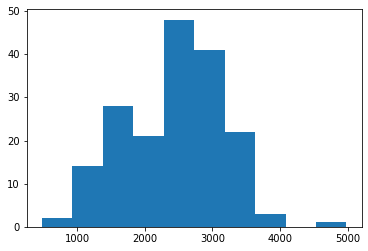

In [34]:
plt.hist(data_a)

(array([  8., 287., 283., 211.,  86.,   9.,   2.,   0.,   1.,   1.]),
 array([   0.,  744., 1488., 2232., 2976., 3720., 4464., 5208., 5952.,
        6696., 7440.]),
 <BarContainer object of 10 artists>)

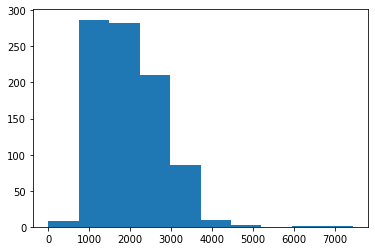

In [35]:
plt.hist(data_b)

In [36]:
# Calculando media y desviación stándar 


media_a = np.mean(data_a)
var_a = np.var(data_a)


media_b = np.mean(data_b)
var_b = np.var(data_b)

print(f"La media de  es de de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en los sábados lluviosos es de {media_a} y la varianza es {var_a}")
print(f"La media de  es de de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en los sábados no lluviosos es de {media_b} y la varianza es {var_b}")


La media de  es de de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en los sábados lluviosos es de 2427.2055555555557 y la varianza es 517403.56330246915
La media de  es de de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en los sábados no lluviosos es de 1999.6756756756756 y la varianza es 575732.9308497686


Prueba la hipótesis:

HO="La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

ma<> mb

H1="La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

ma<> mb

Se considera la prueba de t student ya que son muestras independientes y cumplen distribucione normales.

In [121]:
alpha = 0.05

results = st.ttest_ind(data_a, data_b, equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay suficiente evidencia para concluir que las medias son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que las medias son diferentes.")

valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula. Hay suficiente evidencia para concluir que las medias son diferentes.


En Conclusión, la condición climática en el día del viaje influye significativamente en el tiempo promedio de viaje.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Muy bien!

Gracias por atender los comentarios. Puedo aprobar tu proyecto.
    
Saludos.
</div>